# Exercício 5
Utilizando o dataset Pulsar Star (disponível em https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/)
construa um classificador SVM que classifique as amostras em estrelas de nêutrons ou não.

Avalie a precisão, acurácia e varie o tipo de kernel e parâmetro C para este problema.

### 1 - Vamos importar algumas bibliotecas que iremos utilizar nesse exercício

In [1]:
import seaborn as sb

from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import pandas as pd
from sklearn import svm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### 2 - Vamos ler o conjunto de dados utilizando a função read_csv() do pacote Pandas

In [3]:
pulsar = pd.read_csv('pulsar_stars.csv', sep=',')
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


### 3 - Validação via crossvalidation (k-fold)

In [4]:
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y, resultados)

### 4 - Verificar se a variável "target_class" é binária, visto que queremos classificar em estrelas de nêutrons ou não

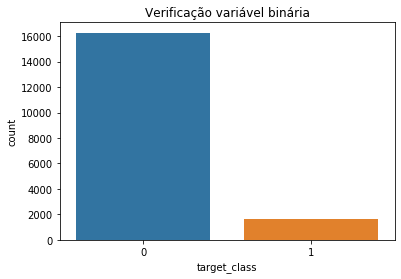

In [6]:
plot = sb.countplot(x='target_class', data=pulsar)
plt.title('Verificação variável binária')
plt.show(plot)

### 5 - Análise do dataset

In [7]:
pulsar.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [8]:
len(pulsar.columns)

9

In [9]:
pulsar.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

Vamos verificar se existem valores faltantes

In [11]:
pulsar.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

Separar a classe dos dados

In [12]:
classes = pulsar['target_class']
pulsar.drop('target_class', axis=1, inplace=True)
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


### 6 - Treinamento do modelo

In [14]:
pip_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm.SVC())
])

pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

Teste de acurácia usando o pipeline 'pip_1' - kernel default

In [16]:
Acuracia(pip_1,pulsar,classes)

0.9774276455469885

Teste de acurácia usando o pipeline 'pip_2' - kernel default com MinMaxScaler

In [17]:
Acuracia(pip_2,pulsar,classes)

0.9773717733825008

Teste de acurácia usando o pipeline 'pip_3' - kernel rbf

In [18]:
Acuracia(pip_3,pulsar,classes)

0.9774276455469885

Teste de acurácia usando o pipeline 'pip_4' - kernel polynomial

In [19]:
Acuracia(pip_4,pulsar,classes)

0.9758073527768466

Teste de acurácia usando o pipeline 'pip_5' - kernel linear

In [20]:
Acuracia(pip_5,pulsar,classes)

0.9786009610012292

### 7 - GridSearch

Faz o tuning dos parametros testando cada combinação utilziando CrossValidation com 10 folds e analisando a acurácia

In [21]:
from sklearn.model_selection import GridSearchCV

lista_C = [0.001, 0.01, 0.1, 1, 10,100]
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [22]:
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

In [23]:
grid = GridSearchCV(pip_5, parametros_grid, cv=10, scoring='accuracy')

In [24]:
grid.fit(pulsar, classes)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0

In [25]:
grid.cv_results_

{'mean_fit_time': array([0.34667006, 0.36442719, 0.34636595, 0.32661247, 0.34866183,
        0.42226968, 0.3456732 , 0.30886674, 0.29929066, 0.25042682,
        0.25031497, 0.25361252, 0.26349049, 0.25759695, 0.25460801,
        0.25431857, 0.26068428, 0.24832149, 0.45487216, 0.5007427 ,
        0.54534082, 0.52498338, 0.49486551, 0.49457238, 1.66583388,
        1.63870509, 1.63092782, 1.63152068, 1.61896386, 1.60570307,
        8.95932806, 8.95363996, 8.93728778, 8.92632542, 8.91275649,
        8.93918869]),
 'std_fit_time': array([0.01149005, 0.02706523, 0.02667399, 0.01060701, 0.03000118,
        0.06806285, 0.07371019, 0.03916555, 0.04548388, 0.00908711,
        0.00866769, 0.01455854, 0.00699005, 0.01336996, 0.00993765,
        0.00814752, 0.0144035 , 0.00498182, 0.03487613, 0.05033407,
        0.06638414, 0.04670427, 0.06349876, 0.04638415, 0.17247881,
        0.1401552 , 0.15325329, 0.16496409, 0.14558054, 0.14698247,
        0.63600066, 0.62782666, 0.66746074, 0.67475922, 0.663

In [26]:
grid.best_params_

{'clf__C': 100, 'clf__gamma': 0.001}

In [27]:
grid.best_score_

0.97904784358791

### 8 - Métricas de Avaliação de Modelos

In [29]:
pip_6 = Pipeline([
    ('scaler', StandardScaler()),
    ('cfl', svm.SVC(kernel='linear', C=100, gamma=0.001))
])

resultados = cross_val_predict(pip_6, pulsar, classes, cv=10)

print(metrics.classification_report(classes, resultados, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     16259
           1       0.94      0.82      0.88      1639

    accuracy                           0.98     17898
   macro avg       0.96      0.91      0.93     17898
weighted avg       0.98      0.98      0.98     17898



Matriz de Confusão

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(classes, resultados)
print(cm)

[[16177    82]
 [  293  1346]]


##### A matriz de confusão mostra que o classificador teve os seguintes resultados:
##### Verdadeiros Positivos = 16177 (Classe Predita = Classe Esperada = Positivo para estrela de neutrons)
##### Verdadeiros Negativos = 1346 (Classe Predita = Classe Esperada = Negativo para estrela de neutrons)
##### Falsos Positivos = 293 (Classe Predita Positiva para estrela de neutrons, Classe Esperada é Negativa)
##### Falsos Negativos = 82 (Classe Predita Negativa para estrela de neutrons, Classe Esperada é Positiva )

##### Com esses resultados, podemos estimar os seguintes parâmetros:
##### Sensibilidade ou Taxa de Verdadeiros Positivos = VP / (VP + FN) = 16177 / (16177+82) = 99.49%
##### Especificidade ou Taxa de Verdadeiros Negativos = VN / (FP+VN) = 1346 / (293+1346) = 82.12%
##### Acurácia = (VP+VN) / (VP+FN+FP+VN) = 17523  / 17898 = 97.90%, que é igual ao resultado obtido com o método grid.best_score_